# Version 1.0

## Data Sources

**OpenWeatherMap**: Smooth data and accurate compared to Google Weather data 

**Open-Mateo**: Very quick to download and free, also provides ensemble forecasting for day ahead timeframe

    Note: Convention to put the target column in the first column (index = 0)

## Regression
**Still to be hyperparamater tuned, to serve as baseline for future models**

- Random Forests
- kNN 
- xGBoost 
- Ridge 

**Notes:**
- Very lightweight models and trains fast on Laptop resources, able to track the seasonality of the wind speed.
- Easily able to incorporate uni-variate and multi-variate structures where the multi-variate forecasting is slightly more acurate.

**Preliminary results**
- The OWM data was proved more suitable for the models to adjust and learn

**To-do**

- Tune hyperparameters
- Play with the windowsize

## Deep-Learning

**PyTorch vs TensorFlow**

[Read the differences ](https://www.turing.com/kb/pytorch-vs-tensorflow)

**Still to be designed and tested**
- NN
- CNN
- RNN
- LSTM
- GNN
- LGBM

_Examples at:_

[Set Scholars](https://setscholars.net/)





# Imports

In [1]:
from shared_utilities import *

# Setup

In [2]:
train_ = False
uni = False

window_size = 24*3 # 24 for OWM and 23 for OM
step = 24

if uni:
    column_ = 0
else:
    column_ = None

dm = WeatherDataModule(data_dir='data\Sere Wind Farm_hourly_OWM.csv', 
                       window_size=window_size, column=column_,
                       batch_size=32, step_=step, 
                       normalize_=True)

dm.prepare_data()
dm.setup('')

if train_:
    train(dm= dm, folder='models_FCST', train_models=True, rfr=True, xgb_=True, knn=True, ridge=True, window_size=window_size, step=step)
rfr_model, xgb_model, knn_model, ridge_model = load_models(dm = dm, folder='models_FCST', window_size=window_size, step=step)

Train: torch.Size([6050, 72, 5])
Valid: torch.Size([1729, 72, 5])
Test: torch.Size([768, 72, 5])
Models loaded...


c:\Users\23603526\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Validate

MSE for Average model: 0.016091525594971828
MSE for kNN model: 0.02165182
MSE for Ridge model: 0.016907001196134194
MSE for Random Forest model: 0.017601799583136665
MSE for XGBoost model: 0.015459475


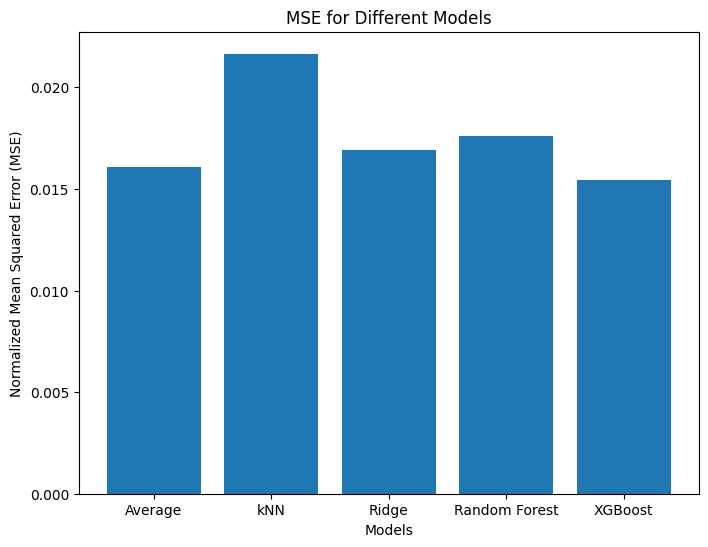

In [3]:
metrics(dm.column, dm.f_valid, dm.t_valid, rfr_model, xgb_model, knn_model, ridge_model, window_size, dm.df.shape[1])

# Inspect

## Logic Inspect 

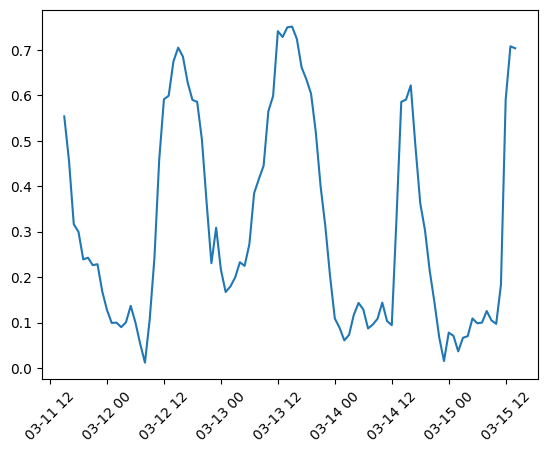

In [4]:
plt.plot(dm.df[dm.split[1]:dm.split[1] + window_size + step][0], label='Data')
plt.xticks(rotation=45)
plt.show()

## Full 

Mean MSE for Random Forest: 3.9657775655524894
Mean MSE for XGBoost: 2.8698043861506646
Mean MSE for kNN: 4.342237952437749
Mean MSE for Ridge: 3.0184078253697133
Mean MSE for Average: 3.209580037555136


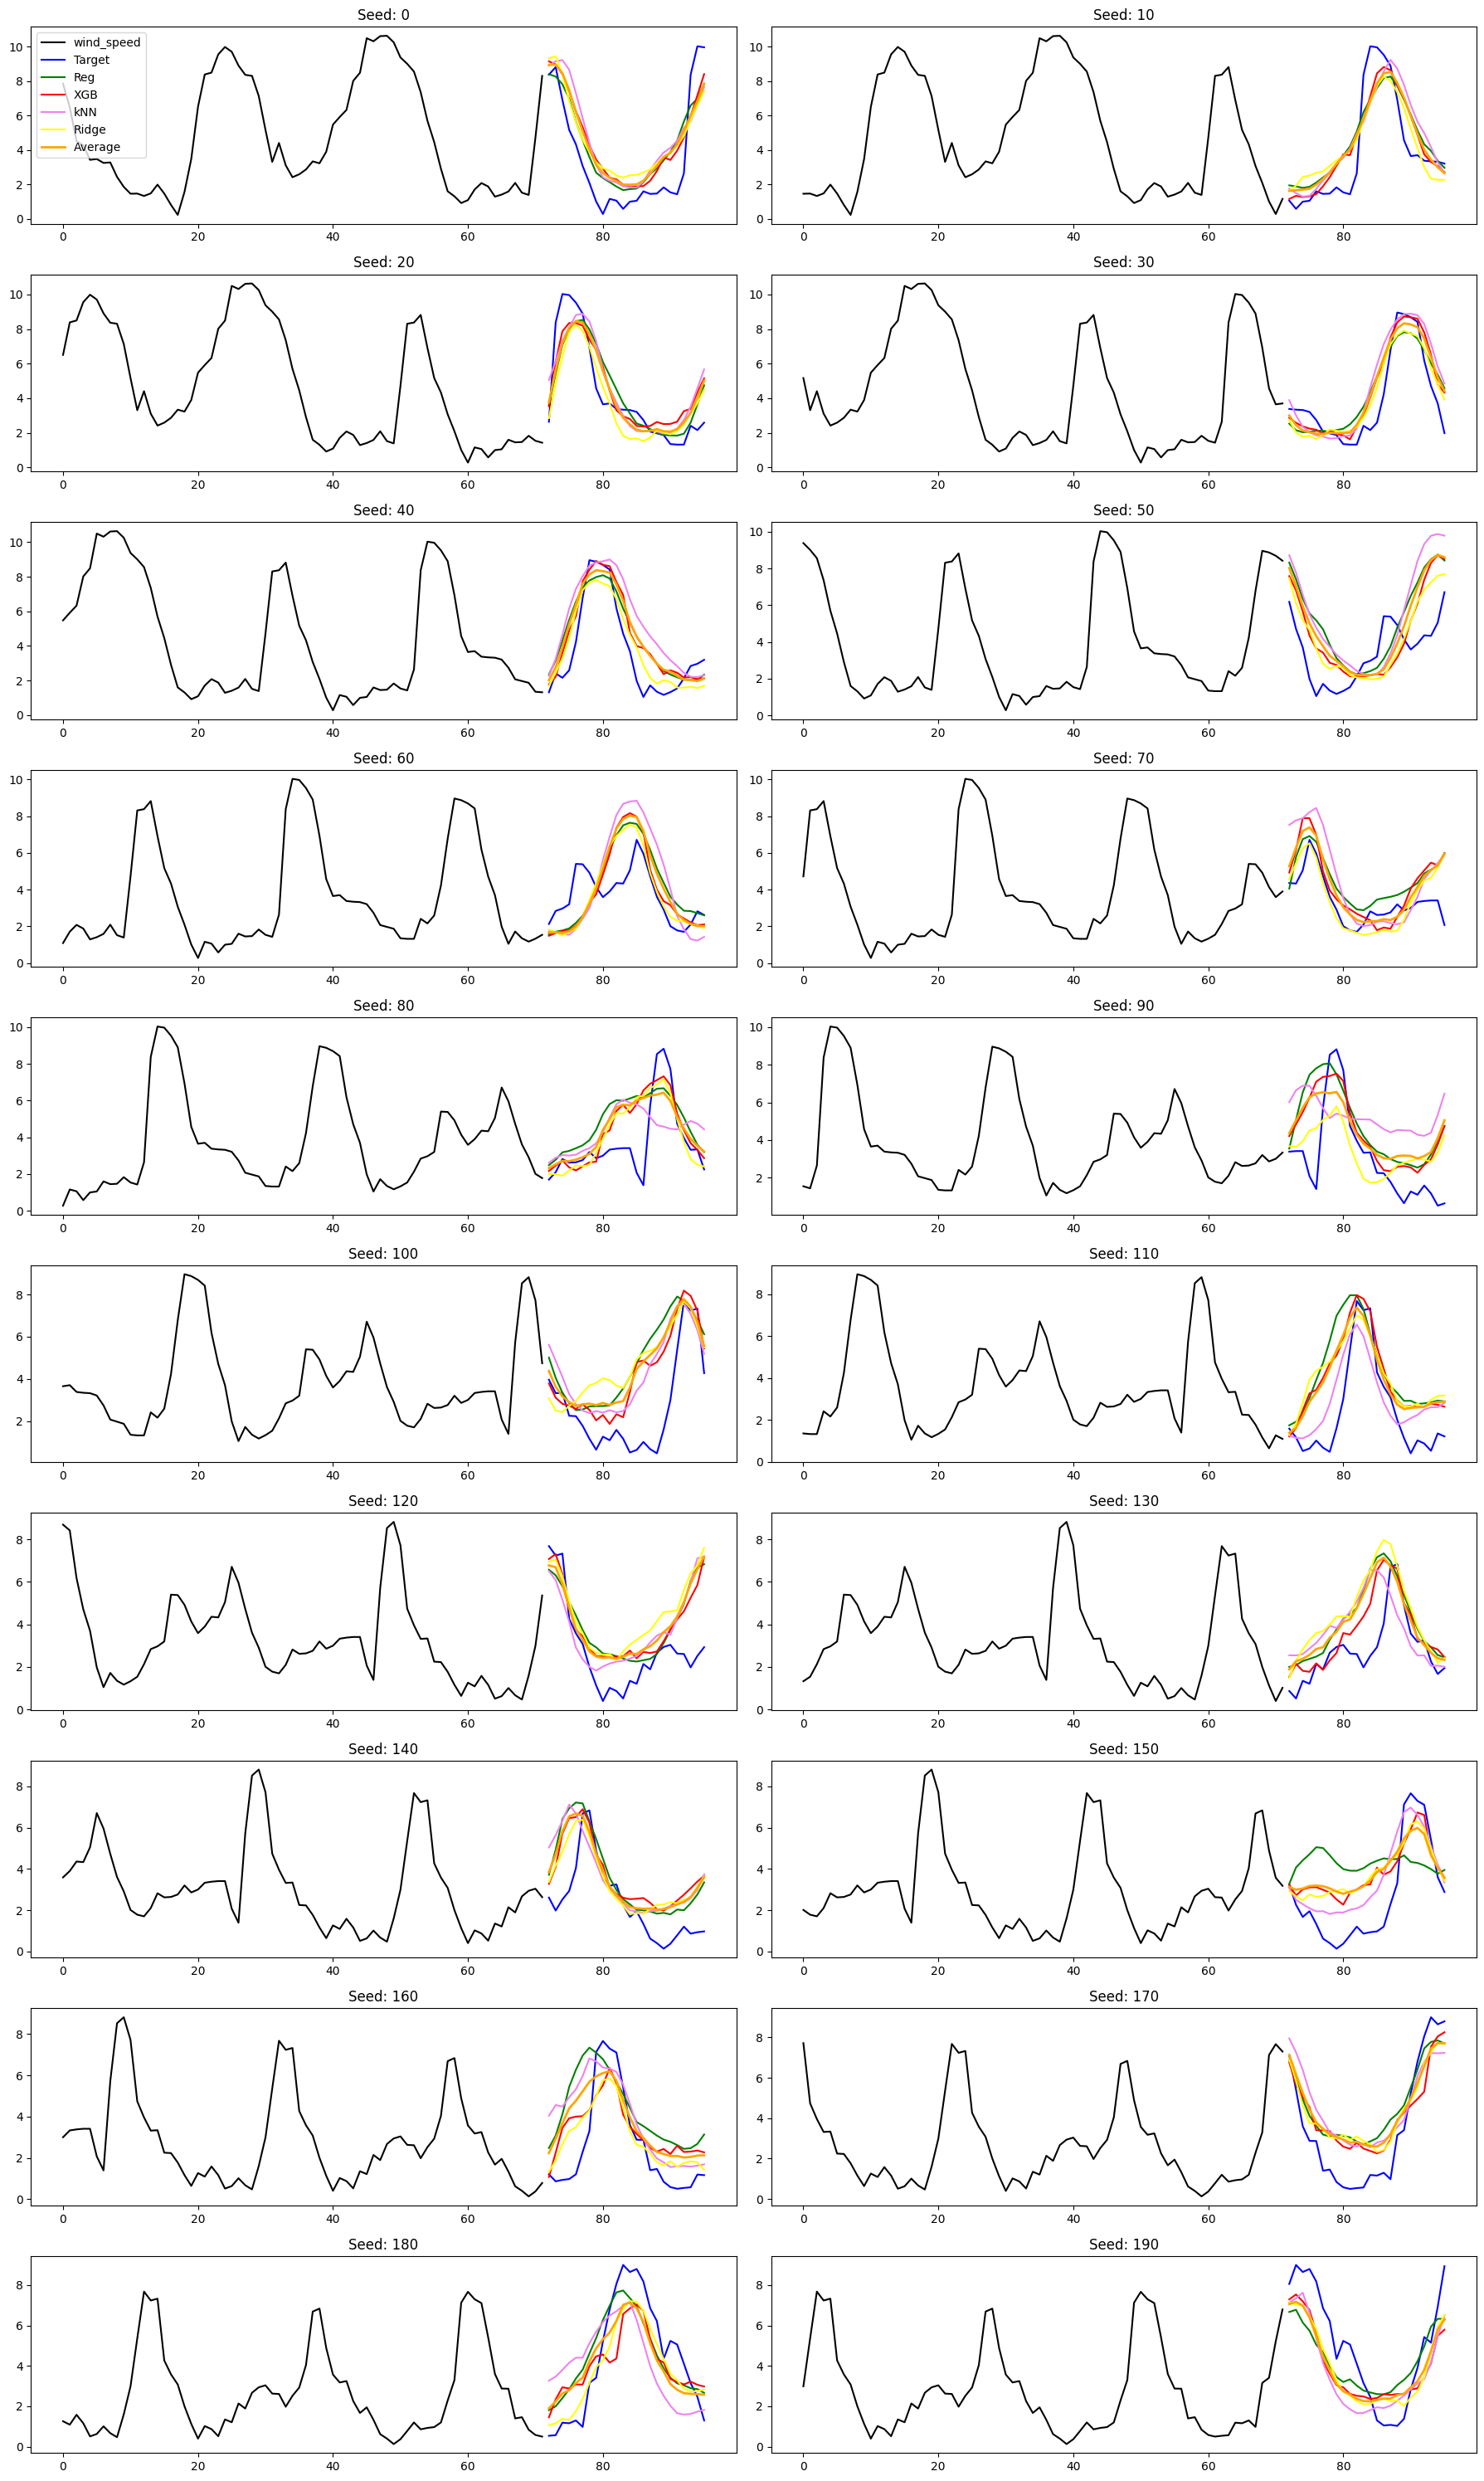

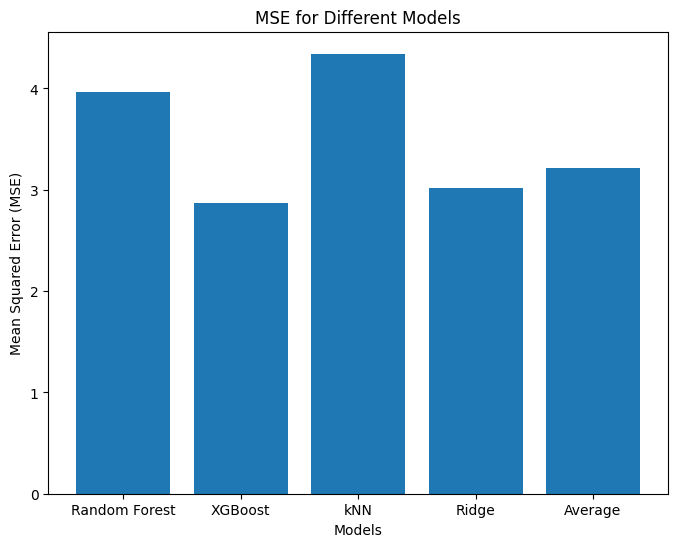

In [5]:
interval = 10

_ = plot_results(seed=0, height=10, width=2, interval=interval, X=dm.f_test, y=dm.t_test,
                 rfr_model= rfr_model, xgb_model=xgb_model, knn_model=knn_model, ridge_model=ridge_model, 
                 plot_features=False, metrics=True, window_size=window_size, step=step, dm=dm) 

# Final Metrics

MSE for Average model: 0.01746158899183786
MSE for kNN model: 0.024488619
MSE for Ridge model: 0.017016541073444736
MSE for Random Forest model: 0.019553520631659698
MSE for XGBoost model: 0.016755976


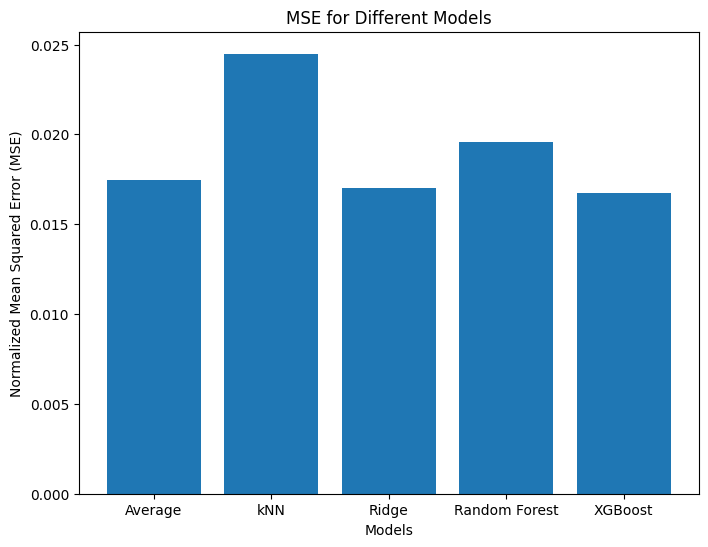

In [6]:
metrics(dm.column, dm.f_test, dm.t_test, rfr_model, xgb_model, knn_model, ridge_model, window_size, dm.df.shape[1])